In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

#### Моменты распределения


Мы не собираемся с вами вдаваться в глубинный смысл статистических моментов распределений случайных величин на данном этапе. Посмотрим только на их выражения и свойства. Первым моментом распределения является его математическое ожидание – $\mathbf{E}$. В случае конечных счетных или бесконечных счетных случайных величин математическое ожидание равно сумме всех исходов, умноженных на их вероятности. В общем непрерывном случае сумма превращается в интеграл, а вероятность исхода – в плотность вероятности, которая в свою очередь задается функцией плотности вероятности. Поскольку и суммы, и интегралы аддитивны, и константы можно выносить как за знак суммы, так и за знак интеграла, математическое ожидание является линейной функцией, т.е. для случайных величин $X$, $Y$ и скаляра $\alpha$ верно
1. $\mathbf{E} \left [X + Y \right ] = \mathbf{E}\left [X \right ] + \mathbf{E}\left [Y \right ]$
2. $\mathbf{E} \left [\alpha X \right ] = \alpha \mathbf{E}\left [X \right ]$

Для обозначения математического ожидания случайной величины чаще используются квадратные скобки, а не круглые, хотя это по сути своей вызов функции.

Вторым моментом распределения случайной величины является её дисперсия – ${\sigma}^{2}$. Дисперсия является математическим ожиданием квадратов отклонений исходов случайной величины от математического ожидания этой величины, т.е. ${\sigma}^{2} \left ( X \right ) = \mathbf{E} \left [ {\left (X - \mathbf{E} \left [X \right ] \right )}^{2} \right]$. Пользуясь свойствами линейных функций, мы можем преобразовать это выражение:

$$
\begin{align}
{\sigma}^{2} \left ( X \right ) &= \mathbf{E} \left [ {\left (X - \mathbf{E} \left [X \right ] \right )}^{2} \right] \\
&= \mathbf{E} \left [ {X}^2 - 2 X \mathbf{E} \left [X \right ] + {\mathbf{E} \left [X \right ]}^{2} \right] \\
&= \mathbf{E} \left [ {X}^2 \right ] - 2 \mathbf{E} \left [X \right ] \mathbf{E} \left [X \right ] + {\mathbf{E} \left [X \right ]}^{2} \\
&= \mathbf{E} \left [ {X}^2 \right ] - 2 {\mathbf{E} \left [X \right ]}^{2} + {\mathbf{E} \left [X \right ]}^{2} \\
&= \mathbf{E} \left [ {X}^2 \right ] - {\mathbf{E} \left [X \right ]}^{2}
\end{align}
$$

Полученное выражение говорит нам, что дисперсия является разницей между ожиданием квадратов исходов случайной величины и квадратом ожидания. Из этого выражения так же легко понять, что дисперсия равна нулю, когда случайная величина является по сути константой, т.е. всегда принимает одно и того же значение. Это верно, потому что мат. ожидание от константной величины равно этой величине. С дисперсией связано ещё одно понятие – стандартное отклонение, которое равно квадратному корню дисперсии $\sigma = \sqrt{{\sigma}^{2}}$. Не любое распределение случайной величины имеет математическое ожидание. Соответственно, такие распределения не имеют и дисперсии. 

Математическое ожидание и определенная через него дисперсия являются характеристиками генеральной совокупности. В английской литературе их так же называют популяционными показателями. Поскольку популяционные величины нам в большинстве случаев недоступны (генеральная совокупность часто необъятна), на практике оперируют с их выборочными аппроксимациями – арифметической средней и выборочной дисперсией. Выборочная средняя случайной величины $X$:

$$
    {\mu}_{X} = \frac{1}{n} \sum_{i=0}^{n}{{x}_{i}}
$$

Её же выборочная дисперсия:

$$
    {Var}_{X} = \frac{1}{n - 1} \sum_{i=0}^{n}{ {\left({x}_{i} - {\mu}_{X} \right )}^{2} }
$$

В отличие от математического ожидания, которое есть не у всякого распределения, выборочное среднее есть у любого распределения, как и выборочная дисперсия (поскольку она выражается через среднее).

Случайные величины могут быть распределены очень по-разному, и наши с вами рассуждения здесь будут по большей части универсальными, несмотря на то, что для визуализации мы будем пользоваться случайными величинами, имеющими нормальное (Гауссовское) распределение. Почему нормальное распределение заслуживает такое особенное место? Во-первых, почитайте основные следствия из центральной пределельной теоремы, во-вторых, Гауссовские распределения удобно представлять графически.

Мы с вами неоднократно наблюдали одномерное Гауссовское распределение. Давайте попробуем нарисовать выборку из 10 наблюдений, отобранных из стандартного нормального распределения (напомню, что у него математическое ожидание равно 0, а стандартное отклонение равно 1).

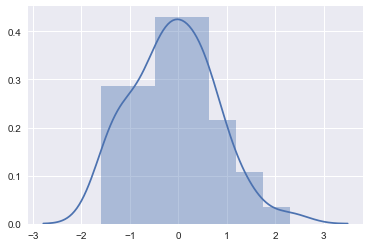

In [3]:
x = np.random.normal(size=50)
sns.distplot(x);

Если вы помните, как выглядит нормальное распределение, то уже должны были сказать, что это не особо на него похоже. Да, потому что выборка очень маленькая. Чем больше будет наша выборка, тем лучше она будет аппроксимировать генеральную совокупность (что выражается в уменьшении стандартной ошибки средней и дисперсии). Попробуем взять выборки побольше.

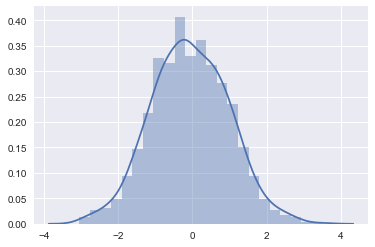

In [4]:
x = np.random.normal(size=1000)
sns.distplot(x);

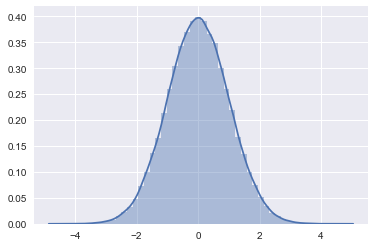

In [5]:
x = np.random.normal(size=100000)
sns.distplot(x);

#### Ковариация

Распределения бывают многомерными. Более того, в реальных аналитических ситуациях одномерные распределения встречаются довольно редко. Многомерное распределение простым языком можно определить как распределение нескольких случайных переменных. Рассмотрим три случайные величины: $A, B, C$. Предположим, что все они имеют стандартное Гауссовское распределение. И предположим, что мы получили выборку из $n$ наблюдений в этом распределении. Запишем эту выборку в виде матрицы $S$, в которой каждый столбец – одно наблюдение:

$$
S = \begin{bmatrix} {a}_{1} &  & {a}_{n} \\ {b}_{1} & \cdots & {b}_{n} \\ {c}_{1} &  & {c}_{n} \end{bmatrix}
$$

Мы получили матрицу формы $3 \times n$. Очевидно, любую матрицу $A$ формы $n \times m$ можно умножить на матрицу ${A}^{T}$ формы формы $m \times n$, где $T$ означает [транспонирование](https://ru.wikipedia.org/wiki/Транспонированная_матрица), получив при этом квадратную матрицу $n \times n$. Давайте попробуем это сделать для нашей матрицы $S$:

$$
C = S \cdot {S}^{T} = \begin{bmatrix} {a}_{1} &  & {a}_{n} \\ {b}_{1} & \cdots & {b}_{n} \\ {c}_{1} &  & {c}_{n} \end{bmatrix} 
\cdot
\begin{bmatrix} {a}_{1} & {b}_{1} & {c}_{1} \\  & \vdots &  \\ {a}_{n} & {b}_{n} & {c}_{n} \end{bmatrix} = 
\begin{bmatrix} 
{a}_{1} \cdot {a}_{1} + \dots + {a}_{n} \cdot {a}_{n} & {a}_{1} \cdot {b}_{1} + \dots + {a}_{n} \cdot {b}_{n} & {a}_{1} \cdot {c}_{1} + \dots + {a}_{n} \cdot {c}_{n} \\
{a}_{1} \cdot {b}_{1} + \dots + {a}_{n} \cdot {b}_{n} & {b}_{1} \cdot {b}_{1} + \dots + {b}_{n} \cdot {b}_{n} & {b}_{1} \cdot {c}_{1} + \dots + {b}_{n} \cdot {c}_{n} \\
{a}_{1} \cdot {c}_{1} + \dots + {a}_{n} \cdot {c}_{n} & {b}_{1} \cdot {c}_{1} + \dots + {b}_{n} \cdot {c}_{n} & {c}_{1} \cdot {c}_{1} + \dots + {c}_{n} \cdot {c}_{n} 
\end{bmatrix} =
\begin{bmatrix} 
\sum_{i=1}^{n}{{{a}_{i}}^{2}} & \sum_{i=1}^{n}{{a}_{i} \cdot {b}_{i}} & \sum_{i=1}^{n}{{a}_{i} \cdot {c}_{i}} \\
\sum_{i=1}^{n}{{a}_{i} \cdot {b}_{i}} & \sum_{i=1}^{n}{{{b}_{i}}^{2}} & \sum_{i=1}^{n}{{b}_{i} \cdot {c}_{i}} \\
\sum_{i=1}^{n}{{a}_{i} \cdot {c}_{i}} & \sum_{i=1}^{n}{{b}_{i} \cdot {c}_{i}} & \sum_{i=1}^{n}{{{c}_{i}}^{2}}
\end{bmatrix}
$$

Довольно легко заметить, что полученная матрица является симметричной относительно главной диагонали (симметричной является любая матрица $A$, для которой выполняется равенство $A = {A}^{T}$). Давайте теперь вспомним, что у стандартного нормального распределения среднее равно нулю, и посмотрим внимательно на главную диагональ матрицы $C$ и выражение для выборочной дисперсии:

$$
    {Var}_{X} = \frac{1}{n - 1} \sum_{i=0}^{n}{ {\left({x}_{i} - {\mu}_{X} \right )}^{2} } =  \frac{1}{n - 1} \sum_{i=0}^{n}{ {{x}_{i}}^{2} }, \quad если \quad {\mu}_{X} = 0
$$

Можно заметить, что за исключением коэффициента $\frac{1}{n - 1}$ значения на главной диагонали в точности соответствуют выражению для выборочной дисперсии. Мы можем умножить каждый член $C$ на этот коэффициент:
$$
C' = 
\begin{bmatrix} 
\frac{1}{n - 1} \sum_{i=1}^{n}{{{a}_{i}}^{2}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{a}_{i} \cdot {b}_{i}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{a}_{i} \cdot {c}_{i}} \\
\frac{1}{n - 1} \sum_{i=1}^{n}{{a}_{i} \cdot {b}_{i}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{{b}_{i}}^{2}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{b}_{i} \cdot {c}_{i}} \\
\frac{1}{n - 1} \sum_{i=1}^{n}{{a}_{i} \cdot {c}_{i}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{b}_{i} \cdot {c}_{i}} & \frac{1}{n - 1} \sum_{i=1}^{n}{{{c}_{i}}^{2}}
\end{bmatrix}
$$
хотя это не имеет фундаментального значения с точки зрения логики дальнейших рассуждений. Тем не менее, теперь должно быть совершенно очевидно, что на главной диагонали мы получили дисперсии по каждому измерению (каждой переменной) нашего трехмерного распределения. На самом деле, то же самое получилось бы и в случае нестандартного нормального распределения: достаточно было бы вычесть средние по каждой строке из матрицы $S$. Так, с главной диагональю мы разобрались – там выборочные дисперсии. А что у нас находится в оставшихся ячейках? Что-то подозрительно похожее на выборочную дисперсию – выборочная ковариация. 

$$
Cov(X, Y) =  \frac{1}{n - 1} \sum_{i=1}^{n}{({x}_{i} - {\mu}_{X}) \cdot ({y}_{i} - {\mu}_{Y})}
$$

Для популяционной ковариации можно получить выражение ещё более напоминающее дисперсию:

$$
Cov(X, Y) = \mathbf{E}[X Y] - \mathbf{E}[X] \mathbf{E}[Y]
$$

Очевидно, что $Cov(X, X) = Var(X)$. Это сходство между дисперсией и коварицией хорошо отражается в английской терминологии: variance (буквально "вариация") и covariance (буквально "совместная вариация"). 

Сама матрица $C'$ называется матрицей ковариации. С ковариацией тесно связано понятие корреляции. Корреляция – ковариация нормированная на стандартное отклонение, поэтому её значение варьирует от $-1$ до $1$. Поскольку у стандартного нормального распределения стандартное отклонение равно 1, ковариация в этом случае равна корреляции. Давайте посмотрим, как изменение значений ковариации влияет на график двухмерного нормального распределения. Будем считать, что на одном измерении лежит распределение случайной величины $X$, на втором – $Y$. Начнем со случая нулевой ковариации и постепенно поднимем её до $1$.

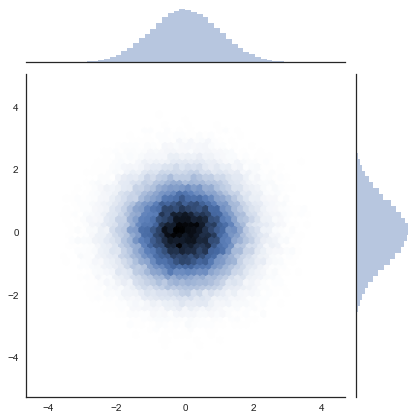

In [7]:
mean = np.array([0, 0])
cov_matrix = np.array([[1.0, 0.0],
                       [0.0, 1.0]])
x, y = np.random.multivariate_normal(mean, cov_matrix, 100000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", stat_func=None);

Каждая тока на этом графике является парой наблюдений $(x, y)$. Чем темнее ячейка на графике, тем больше на неё приходится наблюдений в выборке.

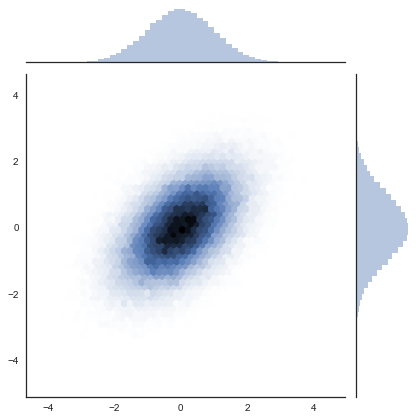

In [8]:
mean = np.array([0, 0])
covariance = np.array([[1.0, 0.5],
                       [0.5, 1.0]])
x, y = np.random.multivariate_normal(mean, covariance, 100000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", stat_func=None);

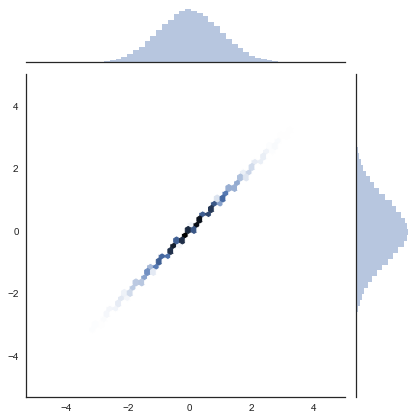

In [12]:
mean = np.array([0, 0])
covariance = np.array([[1.0, 1.0],
                       [1.0, 1.0]])
x, y = np.random.multivariate_normal(mean, covariance, 100000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", stat_func=None);

Похожая картина будет, если сделать ковариацию отрицательной

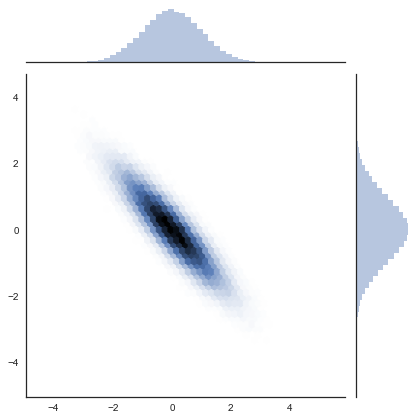

In [11]:
mean = np.array([0, 0])
covariance = np.array([[1.0, -0.9],
                       [-0.9, 1.0]])
x, y = np.random.multivariate_normal(mean, covariance, 100000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", stat_func=None);

Мы видим, что увеличение ковариации приводит к сжатию графика совместного распределения случайных величин $X$ и $Y$ при том, что сами распределения остаются неизменными – у них ровно такие же средние и дисперсии. Таким образом, ковариация является эмерджентной характеристикой системы – совместного распределения случайных величин. Ковариация отражает степень совместной вариации случайных величин. Легко доказать, что ковариация любой пары случайных величин по модулю не может быть больше дисперсий этих величин. В крайнем случае она по модулю будет равна меньшей из двух дисперсий. Ковариация равна $0$, когда распределения двух случайных величин линейно независимы. В противном случае она отражает, сколько информации о вариации одной величины содержится в распределении другой. Именно поэтому в крайнем случае ковариация не может быть больше меньшей из двух дисперсий: в этом случае распределение одной случайной величины полностью отражается распределением другой. В этом случае мы может по большому счету избавиться от одной из случайных величин, потому что она не привносит дополнительной информации в систему.

Удаление части измерений называется уменьшением размерности. В двухмерном случае необходимость этого занятия не очень очевидна, но, как я уже сказал, на практике приходится работать с крайне многомерными распределениями. Есть очень много разных методов уменьшения размерности. Сейчас мы сфокусируемся на двух близкородственных – PCA (principal componend analysis; анализ главных компонент) и PCoA (principal coordinate analysis; анализ главных координат). Спектральная теорема линейной алгебры гласит, что для любой симметричной матрицы можно найти ортогональный собственный базис. Поскольку матрица ковариаций и любая метрическая матрица попарных расстояний (например матрица евклидовых расстояний) является симметричной, мы можем воспользоваться этой теоремой и получить собственный базис. Если мы можем найти для матрицы собственный базис, значит, мы можем переписать её через этот собственный базис в диагональном виде. Что это значит? Как известно, любая матрица записывается через какой-то базис. Следовательно, если мы с вами имеем исходно недиагональную матрицу, то она выражена через какой-то базис. Поскольку базис линейного пространства позволяет выразить при помощи линейной комбинации любой другой вектор в этом линейном пространстве, это же распространяется и на собственные векторы, т.е. они тоже являются линейной комбинацией базисных векторов, в которых матрица записана исходно. Обратное утверждение так же верно – базис, в котором матрица записана исходно, является линейной комбинацией собственного базиса функции, если такой имеется, а у симметричных матриц, как было сказано выше, он гарантировано имеется. Соответственно, если мы имеем недиагональную матрицу ковариации, это означает только то, что есть какой-то базис, в котором эта же матрица ковариации запишется в диагональном виде. А это означает, что ковариации измерений в том базисе будут равны нулю – останутся только дисперсии. Это позволит нам выкинуть часть измерений, оставив только те, вдоль которых наблюдается максимальная дисперсия, минимизировав при этом потерю информации о вариации исходных данных.

Базис, в котором по осям откладываются количества каких-то объектов, является собственным базисом матрицы ковариации только в том случае, когда она диагональна (ковариации равны нулю). В противном случае, если матрица ковариации недиагональна, исходный базис, в котором она записана, не является её собственным базисом. Но, как мы поняли, такой базис существует. Из этого следует очень красивый и глубокий вывод – численности микроорганизмов разных филотипов или другие количественные измерения, которые предстают перед нами линейно связанными, на самом деле являются линейной комбинацией несвязанных источников вариации, существующих в своем базисе.